In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
x refers to the population size in 10,000s <br>
y refers to the profit in $10,000s

In [2]:
data1 = pd.read_csv('ex1data1.txt', header = None, names = ['population','profit'])

In [3]:
display(data1.head())
print(f"data1 has row(s) = {data1.shape[0]}")

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


data1 has row(s) = 97


# Warmup Exercise
Instructions: Return the 5x5 identity matrix

In [4]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# plotData(x, y)
PLOTDATA Plots the data points x and y into a new figure 

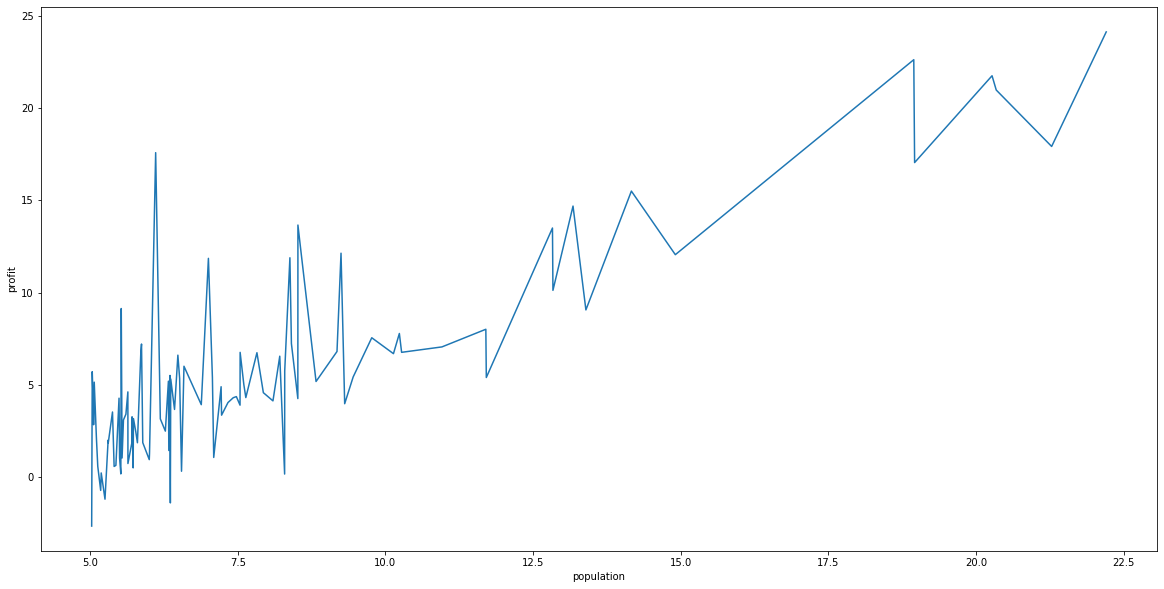

In [5]:
# Personally, I prefer visualization using Seaborn. You can use other tools if you like.

plt.figure(figsize=(20, 10))
sns.lineplot(x='population', y='profit', data=data1)

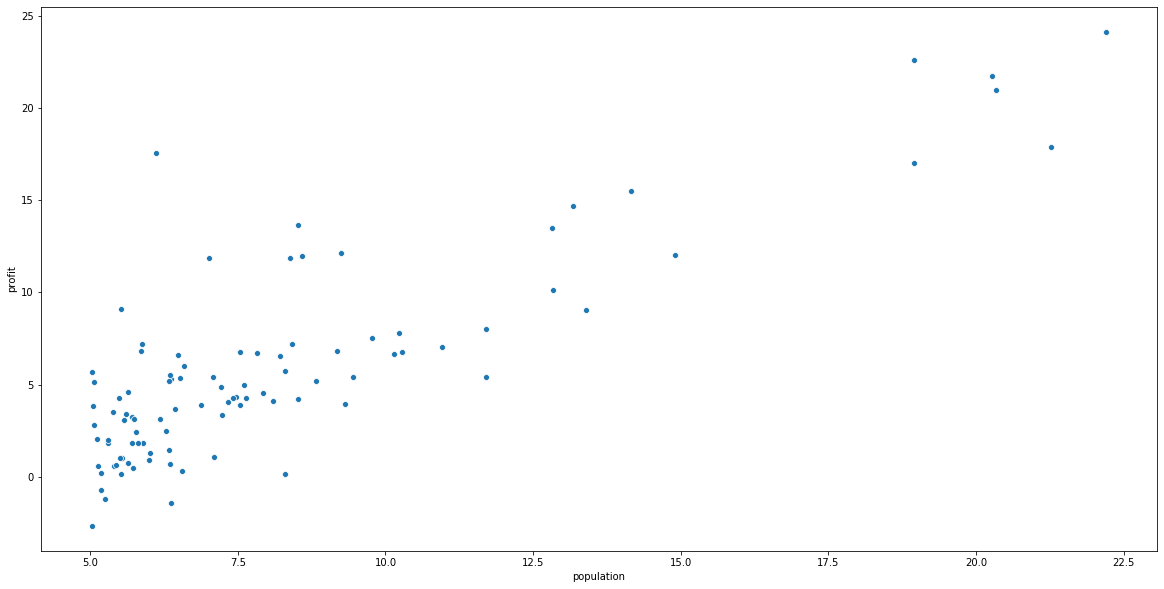

In [6]:
# For better visualization

plt.figure(figsize=(20, 10))
sns.scatterplot(x="population", y="profit", data=data1)

# COMPUTE COST 
Compute cost for linear regression

<img src="formula1.png">

In [7]:
def J(X, y, theta):
    """
    Return the cost of linear regression.

    Parameters:
        X (np.array): array of feature's value (population)
        y (np.array): array of actual value (profit)
        theta (np.array): array of coefficients in Linear Regression 

    Returns:
        cost (float): value generated from cost function of linear regression

    """
    m = len(data1)  # Initialize the number of training data
    h_theta = np.dot(X, theta)
    square_err = (h_theta - y)**2

    return (1/(2*m)) * np.sum(square_err)

# GRADIENT DESCENT 
Performs gradient descent to learn theta <br>
Instructions: Perform a single gradient step on the parameter vector theta

<img src="formula2.png">

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta with specified iteration(num_iters) and learning rate(alpha)

    Parameters:
        X (np.array): array of feature's value (population)
        y (np.array): array of actual value (profit)
        theta (np.array): array of coefficients in Linear Regression 
        alpha (float): learning rate 
        num_iters (int): number of iteration to execute gradient descent

    Returns:
        theta (np.array): array of theta that contribute to the minimum cost function
        J_history (list): python list storing the value of cost function for each iteration

    """

    J_history = []  # Save the cost J in every iteration
    m = len(data1)  # Initialize the number of training data

    for num_iter in range(num_iters):

        h_theta = np.dot(X, theta)
        err = h_theta - y
        descent = np.dot(np.transpose(X), err)
        theta = theta - (alpha * (1/m) * descent)

        J_history.append(J(X, y, theta))  # Save the result into J_history

    return theta, J_history

# Answer validation

In [9]:
data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Check the answer for ComputeCost with theta = [0,0]

In [10]:
# Initialize parameters
m = len(data1)
theta = np.zeros((2, 1))
X = np.array(data1['population'])
X = np.c_[np.ones(m), X]   # Add additional column contains 1 (intercept term)
y = np.array(data1['profit']).reshape(m, 1)

J(X, y, theta)

32.072733877455676

## Check the answer for GradientDescent with theta = [0,0] and alpha = 0.01

In [11]:
# Initialize parameters
m = len(data1)
theta = np.zeros((2, 1))
X = np.array(data1['population'])
X = np.c_[np.ones(m), X]   # Add additional column contains 1 (intercept term)
y = np.array(data1['profit']).reshape(m, 1)

theta, J_history = gradientDescent(X, y, theta, alpha=0.01, num_iters=1500)

Text(0, 0.5, 'Cost')

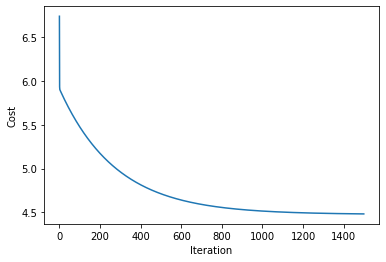

In [12]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [13]:
theta

array([[-3.63029144],
       [ 1.16636235]])

## Plot the best fit line

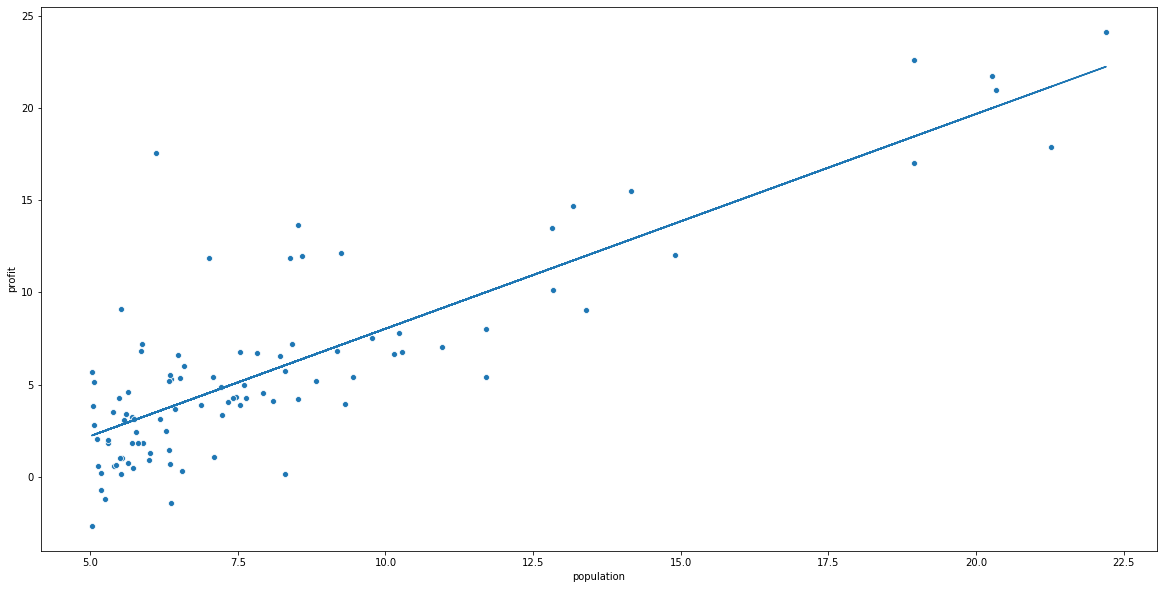

In [14]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='population', y='profit', data=data1)
plt.plot(np.array(data1['population']), np.dot(X, theta))

## Plot 3D surface plot

In [15]:
# Initialize parameters
m = len(data1)
theta = np.zeros((2, 1))
X = np.array(data1['population'])
X = np.c_[np.ones(m), X]   # Add additional column contains 1 (intercept term)
y = np.array(data1['profit']).reshape(m, 1)

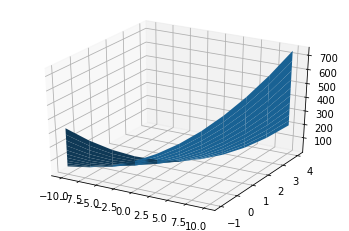

In [16]:
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.arange(-10, 12, 2)
theta_1 = np.arange(-1, 4.5, 0.5)
cost_list = np.zeros([len(theta_0), len(theta_1)])


for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        theta = np.array([theta_0[i], theta_1[j]]).reshape(-1, 1)

        # Compute cost function for any theta0 and theta1
        cost = J(X, y, theta)
        cost_list[i, j] = cost 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Error will occur if this line of code does not exist. I don't know why.
ax.plot_surface(theta_0, theta_1, cost_list)